In [2]:
import pandas as pd

In [40]:
cols = ['user_id','age','gender', 'occupation', 'postal_code']
frame = pd.read_table('resources/u.user', sep='|', header=None,  names=cols)
frame.head()

# OR

# dtypes = {
#     'user_id': 'int16',
#     'age': 'int8',
#     'gender': 'category',
#     'occupation': 'category',
#     'postal_code': 'string'
# }

# persons_df = pd.read_table(
#     filepath_or_buffer='resources/u.user',
#     sep='|',
#     header=None,
#     names=cols,
#     dtype=dtypes
# )

# persons_df.head()

,user_id,age,gender,occupation,postal_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [41]:
frame.describe()


,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [42]:
frame.memory_usage(deep=True)


Index            128
user_id         7544
age             7544
gender         54694
occupation     61400
postal_code    58466
dtype: int64

In [43]:
frame.dtypes


user_id         int64
age             int64
gender         object
occupation     object
postal_code    object
dtype: object

## convert items to suitable dtypes to make it compress

In [44]:
frame['gender'] = frame['gender'].astype('category')
frame['occupation'] = frame['occupation'].astype('category')
frame['postal_code'] = frame['postal_code'].astype('string')


In [45]:
frame.memory_usage(deep=True)

Index            128
user_id         7544
age             7544
gender          1167
occupation      2868
postal_code    58466
dtype: int64

In [33]:
# frame.describe(include=['object']) # RAISE ERROR SINCE THERE IS NO OBJECT TYPE ANYMORE

In [46]:

frame.rename(columns={"postal_code":"zip_code"}, inplace=True)

In [47]:
frame


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [48]:
frame.columns


Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [49]:
frame.columns = frame.columns.str.replace('_', '-')

In [50]:
frame.columns


Index(['user-id', 'age', 'gender', 'occupation', 'zip-code'], dtype='object')

## DROPING DATA

In [51]:
frame2 = frame

In [55]:
frame2.drop(columns=['zip-code'], axis=1)

,user-id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other
...,...,...,...,...
938,939,26,F,student
939,940,32,M,administrator
940,941,20,M,student
941,942,48,F,librarian


In [57]:
frame2.drop(index=frame2.index[0:5], axis=0)

,user-id,age,gender,occupation,zip-code
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [59]:
frame.head()

,user-id,age,gender,occupation,zip-code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## SORTING

In [58]:
frame.age.sort_values()

29      7
470    10
288    11
879    13
608    13
       ..
584    69
766    70
802    70
859    70
480    73
Name: age, Length: 943, dtype: int64

In [ ]:
frame.age.sort_values(ascending=False)

In [60]:
frame.sort_values('age')

,user-id,age,gender,occupation,zip-code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
879,880,13,M,student,83702
608,609,13,F,student,55106
...,...,...,...,...,...
584,585,69,M,librarian,98501
766,767,70,M,engineer,00000
802,803,70,M,administrator,78212
859,860,70,F,retired,48322


In [63]:
 frame.sort_values(['age', 'zip-code'],ascending=[False, False])

,user-id,age,gender,occupation,zip-code
480,481,73,M,retired,37771
802,803,70,M,administrator,78212
859,860,70,F,retired,48322
766,767,70,M,engineer,00000
584,585,69,M,librarian,98501
...,...,...,...,...,...
608,609,13,F,student,55106
141,142,13,M,other,48118
288,289,11,M,none,94619
470,471,10,M,student,77459


## FILTERING

In [64]:
frame.loc[frame.occupation.isin(['student', 'librarian'])]

,user-id,age,gender,occupation,zip-code
8,9,29,M,student,01002
18,19,40,M,librarian,02138
26,27,40,F,librarian,30030
29,30,7,M,student,55436
31,32,28,F,student,78741
...,...,...,...,...,...
932,933,28,M,student,48105
938,939,26,F,student,33319
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [65]:
# frame_with_ignored_cols = pd.read_csv('path_to_csv.file', usecols=[<indexes> | <col_names>])

In [66]:
# frame_with_slice_rows = pd.read_csv('path_to_csv.file', nrows=3)

In [68]:
drinks = pd.read_csv('resources/drinks.csv', index_col='country')

In [73]:
drinks.continent = drinks.continent.astype('category')

In [74]:
drinks.dtypes

beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [78]:
import numpy as np
drinks.select_dtypes(include=[np.number])

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Afghanistan,0,0,0,0.0
Albania,89,132,54,4.9
Algeria,25,0,14,0.7
Andorra,245,138,312,12.4
Angola,217,57,45,5.9
...,...,...,...,...
Venezuela,333,100,3,7.7
Vietnam,111,2,1,2.0
Yemen,6,0,0,0.1


In [82]:
drinks.describe(include=['int64'])

,beer_servings,spirit_servings,wine_servings
count,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777
std,101.143103,88.284312,79.697598
min,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000
50%,76.000000,56.000000,8.000000
75%,188.000000,128.000000,59.000000
max,376.000000,438.000000,370.000000


In [88]:
# If data include categorical columns error will be raised.
drinks.drop(columns=['continent']).mean(axis=0)

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [89]:
drinks.drop(columns=['continent']).mean(axis='columns') # .mean(axis=1) 1=columns

country
Afghanistan      0.000
Albania         69.975
Algeria          9.925
Andorra        176.850
Angola          81.225
                ...   
Venezuela      110.925
Vietnam         29.000
Yemen            1.525
Zambia          14.375
Zimbabwe        22.675
Length: 193, dtype: float64

In [90]:
drinks

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa
...,...,...,...,...,...
Venezuela,333,100,3,7.7,South America
Vietnam,111,2,1,2.0,Asia
Yemen,6,0,0,0.1,Asia


In [91]:
drinks['beer_servings'] = drinks.beer_servings.astype(float)

In [92]:
drinks


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0.0,0,0,0.0,Asia
Albania,89.0,132,54,4.9,Europe
Algeria,25.0,0,14,0.7,Africa
Andorra,245.0,138,312,12.4,Europe
Angola,217.0,57,45,5.9,Africa
...,...,...,...,...,...
Venezuela,333.0,100,3,7.7,South America
Vietnam,111.0,2,1,2.0,Asia
Yemen,6.0,0,0,0.1,Asia


In [93]:
drinks = pd.read_csv('resources/drinks.csv', dtype={'country':str,'beer_servings':float})

In [94]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

## MODIFICATION IN VALUES

In [106]:
orders = pd.read_table('resources/chipotle.tsv')

In [107]:
orders

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [108]:
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')

In [109]:
orders

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [110]:
orders.item_price.mean()

7.464335785374297

## GROUPBY AND AGGREGATION FUNCTIONS

In [160]:
drinks.groupby(by=['continent']).beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [121]:
drinks.loc[drinks.continent == 'Africa'].beer_servings.mean()

# OR

# drinks.groupby(by=['continent']).beer_servings.mean()['Africa']

61.471698113207545

In [113]:
drinks.loc[drinks.continent == "Africa"].beer_servings.agg(['max','min'])

max    376.0
min      0.0
Name: beer_servings, dtype: float64

In [122]:
drinks.groupby(by=['continent']).beer_servings.agg(['max','min'])


,max,min
continent,,
Africa,376.0,0.0
Asia,247.0,0.0
Europe,361.0,0.0
North America,285.0,1.0
Oceania,306.0,0.0
South America,333.0,93.0


In [127]:
drinks_numerics =  drinks.drop(columns=['country'])
drinks_numerics.groupby(by=['continent']).mean()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


## VISUALIZATION

In [153]:
%matplotlib inline

<Axes: xlabel='continent'>

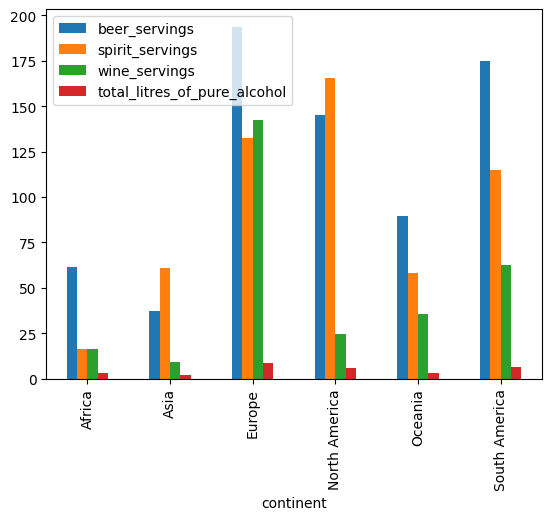

In [162]:
drinks_numerics.groupby(by=['continent']).mean().plot(kind='bar')


In [163]:
drinks.continent.describe()

count        193
unique         6
top       Africa
freq          53
Name: continent, dtype: object

In [164]:
drinks.continent.describe().unique

<bound method Series.unique of count        193
unique         6
top       Africa
freq          53
Name: continent, dtype: object>

In [165]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [171]:
drinks.continent.value_counts()

continent
Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: count, dtype: int64

In [172]:
drinks.groupby(by=['continent']).count()['country']

continent
Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: country, dtype: int64

In [174]:
drinks.continent.value_counts(normalize=True)

continent
Africa           0.274611
Europe           0.233161
Asia             0.227979
North America    0.119171
Oceania          0.082902
South America    0.062176
Name: proportion, dtype: float64

In [177]:
drinks.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [176]:
drinks.continent.nunique()

6

In [180]:
pd.crosstab(drinks.country, drinks.continent)

continent,Africa,Asia,Europe,North America,Oceania,South America
country,,,,,,
Afghanistan,0,1,0,0,0,0
Albania,0,0,1,0,0,0
Algeria,1,0,0,0,0,0
Andorra,0,0,1,0,0,0
Angola,1,0,0,0,0,0
...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,1
Vietnam,0,1,0,0,0,0
Yemen,0,1,0,0,0,0


In [187]:
drinks.beer_servings.describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

In [182]:
%matplotlib inline

<Axes: xlabel='continent'>

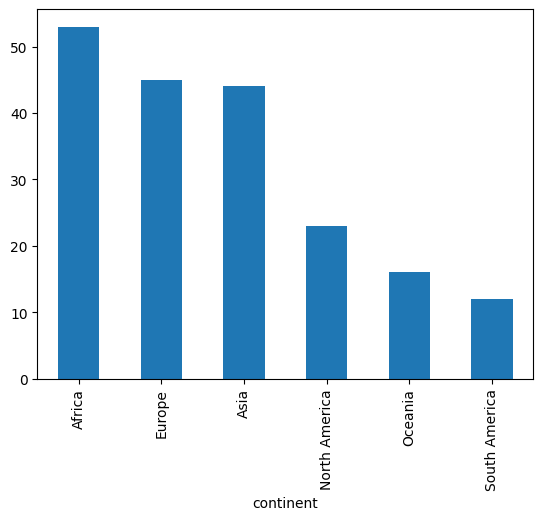

In [183]:
drinks.continent.value_counts().plot(kind='bar')

In [194]:
drinks.beer_servings.min(), drinks.beer_servings.max(), drinks.beer_servings.value_counts(sort=True, ascending=False)

(0.0,
 376.0,
 beer_servings
 0.0      15
 5.0       5
 25.0      4
 21.0      4
 31.0      4
          ..
 234.0     1
 69.0      1
 28.0      1
 142.0     1
 64.0      1
 Name: count, Length: 130, dtype: int64)

<Axes: ylabel='Frequency'>

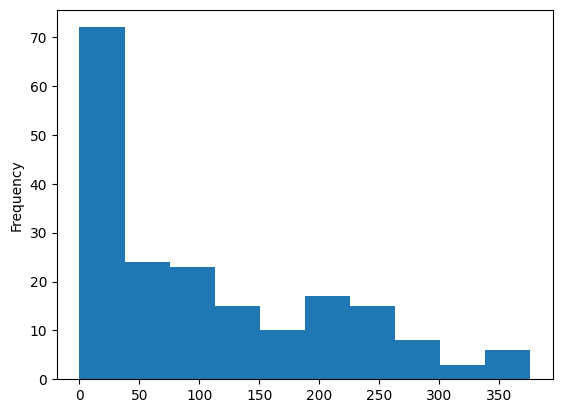

In [184]:
drinks.beer_servings.plot(kind='hist')

# HANDLING MISSING VALUES


In [339]:

ufo = pd.read_csv('resources/ufo.csv', names=['city', 'color', 'ufo_shape', 'state', 'time'], header=0)
ufo.city = ufo.city.astype('category')
ufo.color = ufo.color.astype('category')
ufo.ufo_shape = ufo.ufo_shape.astype('category')
ufo.state = ufo.state.astype('category')
ufo.time = pd.to_datetime(ufo.time)


ufo


,city,color,ufo_shape,state,time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [340]:
ufo.isnull()

,city,color,ufo_shape,state,time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False
...,...,...,...,...,...
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False


In [341]:
ufo.isnull().sum(axis=0)

city            26
color        15359
ufo_shape     2644
state            0
time             0
dtype: int64

In [342]:
ufo.isnull().sum(axis=1)

0        1
1        1
2        1
3        1
4        1
        ..
18236    1
18237    1
18238    2
18239    0
18240    1
Length: 18241, dtype: int64

In [343]:
ufo = ufo.loc[ufo.isnull().sum(axis=1) < 2] # removing rows with more than 2 null values

In [344]:
ufo

,city,color,ufo_shape,state,time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18234,Capitola,NaN,TRIANGLE,CA,2000-12-31 22:00:00
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [345]:
ufo.isnull().sum() # from here I can realize that there are a huge volume of nulls in color column so I have to do something for this

city             4
color        13089
ufo_shape      391
state            0
time             0
dtype: int64

In [346]:
ufo.color.isnull().sum()

13089

# EXP 1

In [347]:
percentages_dict = dict(ufo.color.value_counts(normalize=True))
percentages_dict

{'RED': 0.27073932662270045,
 'GREEN': 0.18396390142311697,
 'ORANGE': 0.1832696980215203,
 'BLUE': 0.15619576535925025,
 'YELLOW': 0.05866018743491843,
 'RED GREEN': 0.030892051371051717,
 'RED BLUE': 0.027073932662270046,
 'RED ORANGE': 0.015272474835126693,
 'GREEN BLUE': 0.011801457827143353,
 'RED GREEN BLUE': 0.011454356126345018,
 'ORANGE YELLOW': 0.009024644220756682,
 'RED YELLOW': 0.008677542519958347,
 'ORANGE GREEN': 0.00798333911836168,
 'YELLOW GREEN': 0.005900728913571677,
 'ORANGE BLUE': 0.003471017007983339,
 'RED YELLOW GREEN': 0.0031239153071850054,
 'YELLOW BLUE': 0.0020826102047900035,
 'YELLOW GREEN BLUE': 0.0017355085039916696,
 'ORANGE GREEN BLUE': 0.0017355085039916696,
 'RED ORANGE YELLOW': 0.0013884068031933356,
 'RED YELLOW GREEN BLUE': 0.0013884068031933356,
 'RED ORANGE BLUE': 0.0010413051023950017,
 'RED ORANGE GREEN': 0.0010413051023950017,
 'RED YELLOW BLUE': 0.0010413051023950017,
 'ORANGE YELLOW GREEN': 0.0003471017007983339,
 'ORANGE YELLOW BLUE': 0.

In [348]:
import copy
ufo_cpy = copy.deepcopy(ufo)

In [349]:
ufo_cpy.loc[ufo_cpy.color.isnull()]

,city,color,ufo_shape,state,time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18231,Pismo Beach,NaN,OVAL,CA,2000-12-31 20:00:00
18234,Capitola,NaN,TRIANGLE,CA,2000-12-31 22:00:00
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00


In [350]:
null_color_counts = ufo_cpy.color.isnull().sum()
null_color_counts

13089

In [351]:
import random

generated_colors = random.choices(list(percentages_dict.keys()), weights=percentages_dict.values(), k=null_color_counts)
len(generated_colors)

13089

In [352]:
ufo_cpy.loc[ufo_cpy.color.isnull(), 'color'] = generated_colors

In [353]:
ufo_cpy.isnull().sum()

city           4
color          0
ufo_shape    391
state          0
time           0
dtype: int64

# EXP 2

In [354]:
shape_percentages = dict(ufo.ufo_shape.value_counts(normalize=True))
shape_percentages

{'LIGHT': 0.17979331150908273,
 'DISK': 0.1360806213492522,
 'TRIANGLE': 0.12106040182296682,
 'OTHER': 0.08992875024070865,
 'CIRCLE': 0.08748956929199564,
 'SPHERE': 0.06752679889594967,
 'FIREBALL': 0.06662815328326593,
 'OVAL': 0.054175492650362665,
 'CIGAR': 0.03960459593041915,
 'FORMATION': 0.027793825020861414,
 'VARIOUS': 0.021310738815071572,
 'RECTANGLE': 0.01938506964503498,
 'CYLINDER': 0.01887155786635856,
 'CHEVRON': 0.015918865138969125,
 'DIAMOND': 0.015020219526285385,
 'EGG': 0.012581038577572373,
 'FLASH': 0.01206752679889595,
 'TEARDROP': 0.007638487707811798,
 'CONE': 0.0038513383400731755,
 'CROSS': 0.002310803004043905,
 'DELTA': 0.0004493228063418705,
 'ROUND': 0.00012837794466910585,
 'CRESCENT': 0.00012837794466910585,
 'HEXAGON': 6.418897233455292e-05,
 'DOME': 6.418897233455292e-05,
 'PYRAMID': 6.418897233455292e-05,
 'FLARE': 6.418897233455292e-05}

In [355]:
null_shape_count = ufo_cpy.ufo_shape.isnull().sum()
null_shape_count

391

In [356]:
generated_shapes = random.choices(list(shape_percentages.keys()), shape_percentages.values(), k=null_shape_count)
len(generated_shapes)

391

In [357]:
# new_categories = set(generated_shapes) - set(ufo_cpy['ufo_shape'].cat.categories)
# dd
# # If there are new categories, add them to the categories of the 'color' column
# if new_categories:
#     ufo_cpy['ufo_shape'] = ufo_cpy['ufo_shape'].cat.add_categories(new_categories)

In [358]:
ufo_cpy.loc[ufo_cpy.ufo_shape.isnull(), 'ufo_shape'] = generated_shapes

# AS YOU CAN SEE PERCENTAGES HAVE A SMALL CHANGES

In [384]:
before = dict(ufo.ufo_shape.value_counts(normalize=True))
after = dict(ufo_cpy.ufo_shape.value_counts(normalize=True))
before, after


({'LIGHT': 0.17979331150908273,
  'DISK': 0.1360806213492522,
  'TRIANGLE': 0.12106040182296682,
  'OTHER': 0.08992875024070865,
  'CIRCLE': 0.08748956929199564,
  'SPHERE': 0.06752679889594967,
  'FIREBALL': 0.06662815328326593,
  'OVAL': 0.054175492650362665,
  'CIGAR': 0.03960459593041915,
  'FORMATION': 0.027793825020861414,
  'VARIOUS': 0.021310738815071572,
  'RECTANGLE': 0.01938506964503498,
  'CYLINDER': 0.01887155786635856,
  'CHEVRON': 0.015918865138969125,
  'DIAMOND': 0.015020219526285385,
  'EGG': 0.012581038577572373,
  'FLASH': 0.01206752679889595,
  'TEARDROP': 0.007638487707811798,
  'CONE': 0.0038513383400731755,
  'CROSS': 0.002310803004043905,
  'DELTA': 0.0004493228063418705,
  'ROUND': 0.00012837794466910585,
  'CRESCENT': 0.00012837794466910585,
  'HEXAGON': 6.418897233455292e-05,
  'DOME': 6.418897233455292e-05,
  'PYRAMID': 6.418897233455292e-05,
  'FLARE': 6.418897233455292e-05},
 {'LIGHT': 0.1808843793060253,
  'DISK': 0.1358511837655017,
  'TRIANGLE': 0.1204

In [385]:
ufo_cpy.isnull().sum()

city         0
color        0
ufo_shape    0
state        0
time         0
dtype: int64

In [386]:
ufo_cpy.dropna(how='any', inplace=True)

In [387]:
ufo_cpy.city.isnull().sum()

0

In [388]:
ufo.dropna(how='any')

,city,color,ufo_shape,state,time
12,Belton,RED,SPHERE,SC,1939-06-30 20:00:00
19,Bering Sea,RED,OTHER,AK,1943-04-30 23:00:00
36,Portsmouth,RED,FORMATION,VA,1945-07-10 01:30:00
44,Blairsden,GREEN,SPHERE,CA,1946-06-30 19:00:00
82,San Jose,BLUE,CHEVRON,CA,1947-07-15 21:00:00
...,...,...,...,...,...
18213,Pasadena,GREEN,FIREBALL,CA,2000-12-28 19:10:00
18216,Garden Grove,ORANGE,LIGHT,CA,2000-12-29 16:10:00
18220,Shasta Lake,BLUE,DISK,CA,2000-12-29 20:30:00
18233,Anchorage,RED,VARIOUS,AK,2000-12-31 21:00:00


In [389]:
ufo.dropna(how='all')

,city,color,ufo_shape,state,time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18234,Capitola,NaN,TRIANGLE,CA,2000-12-31 22:00:00
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [390]:
ufo.dropna(subset=['city', 'ufo_shape'], how='all')

,city,color,ufo_shape,state,time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18234,Capitola,NaN,TRIANGLE,CA,2000-12-31 22:00:00
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [391]:
ufo['ufo_shape'].value_counts(dropna=False) # by default dropna = True

ufo_shape
LIGHT        2801
DISK         2120
TRIANGLE     1886
OTHER        1401
CIRCLE       1363
SPHERE       1052
FIREBALL     1038
OVAL          844
CIGAR         617
FORMATION     433
NaN           391
VARIOUS       332
RECTANGLE     302
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           196
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
FLARE           1
HEXAGON         1
DOME            1
PYRAMID         1
Name: count, dtype: int64

# Indexing application in dataframes:
1. Identification (each row has a sticky identifier)
2. Selection (using loc function)
3. Allignment (mix to dataseries our dataframes together even if they don't have equal length and it matches by indexes)

In [393]:
# Alignment example
serie_1 = pd.Series([1000, 2000, 3000], index=["Chips", "Pofak", "Pastil"], name="HaleHoole")
serie_2 = pd.Series([227, 149], index=["Chips", "Pastil"], name="HaleHoole_tedad")
serie_1 * serie_2


0    227000.0
1    298000.0
2         NaN
dtype: float64

In [404]:
# or another example for allignment:

pd.concat(objs=[serie_1, serie_2], axis=1, join='inner')

,HaleHoole,HaleHoole_tedad
0,1000,227
1,2000,149


# What is loc and iloc and ix

### loc works with labels
### frame.loc[rows, columns] like frame.loc[1, :] means row one but all columns

### iloc uses integer position of rows and columns
### frame.iloc[2:5, :]

### ix uses mix of integer positions and labels for finding
### frame.ix[2:5, 'a':'z'] or frame.ix['a':'z', 1:4]   (DEPRECATED)

# ranges :
## 3:6 means 3,4,5,6 in loc and 3,4,5 in iloc
## so ranges are inclusive in loc but not in iloc

# When should I use frame.loc[] and when should I use frame[] when we have boolean filtering?

##### If you need to filter rows based on boolean conditions and also specify specific columns, use frame.loc[].
##### If you're only filtering rows based on boolean conditions and don't need to select specific columns, you can use either frame[] or frame.loc[], but frame[] is generally more concise. 
##### If you're only selecting specific columns (without any boolean filtering), use frame[].

## Working with category datatype

In [421]:
import pandas as pd
drinks = pd.read_csv('resources/drinks.csv')

In [422]:
drinks
sorted(drinks.continent.unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [423]:
drinks.memory_usage(deep=True).sum()

31224

In [424]:
# drinks.continent = drinks.continent.astype('category')
# or
drinks.continent = drinks.continent.astype(pd.api.types.CategoricalDtype(categories = sorted(drinks.continent.unique()), ordered=True))


In [425]:
drinks.loc[drinks.continent > 'Europe'].sort_values('continent') # IMPORTANT

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,North America
109,Mexico,238,68,5,5.5,North America
130,Panama,285,104,18,7.2,North America
84,Jamaica,82,97,9,3.4,North America
74,Honduras,69,98,2,3.0,North America
73,Haiti,1,326,1,5.9,North America
69,Guatemala,53,69,2,2.2,North America
68,Grenada,199,438,28,11.9,North America
143,St. Kitts & Nevis,194,205,32,7.7,North America
54,El Salvador,52,69,2,2.2,North America


### drinks.country = drinks.country.astype('category') 
#### this conversion is not memory efficient because in the normal state pandas stores 193 strings 
#### for the countries but after this code it should save 193 integers and 193 strings again for the category map.

#### But as a result we can say that converting to category dtypes makes computaions faster when 
#### we have large volume of data


In [416]:
drinks.memory_usage(deep=True).sum()

19648

In [418]:
drinks.country = drinks.country.astype('category')

In [419]:
drinks.memory_usage(deep=True).sum()


24202

In [420]:
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   country                       193 non-null    category
 1   beer_servings                 193 non-null    int64   
 2   spirit_servings               193 non-null    int64   
 3   wine_servings                 193 non-null    int64   
 4   total_litres_of_pure_alcohol  193 non-null    float64 
 5   continent                     193 non-null    category
dtypes: category(2), float64(1), int64(3)
memory usage: 23.6 KB


In [426]:
drinks.continent.sort_values().head(70)

96     Africa
104    Africa
101    Africa
100    Africa
97     Africa
        ...  
128      Asia
138      Asia
137      Asia
190      Asia
189      Asia
Name: continent, Length: 70, dtype: category
Categories (6, object): ['Africa' < 'Asia' < 'Europe' < 'North America' < 'Oceania' < 'South America']

# Working with samples

In [ ]:
import pandas as pd

In [ ]:
drinks = pd.read_csv('resources/drinks.csv')

In [430]:
sample = drinks.sample(3)
sample

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
147,San Marino,0,0,0,0.0,Europe
39,Congo,76,1,9,1.7,Africa
150,Senegal,9,1,7,0.3,Africa


In [442]:
drinks.count()

country                         193
beer_servings                   193
spirit_servings                 193
wine_servings                   193
total_litres_of_pure_alcohol    193
continent                       193
dtype: int64

In [436]:
train = drinks.sample(frac=0.25)
len(train)

48

In [444]:
test = drinks.loc[~drinks.index.isin(train.index), :] # to seperate train and test dataset
test.count()

country                         145
beer_servings                   145
spirit_servings                 145
wine_servings                   145
total_litres_of_pure_alcohol    145
continent                       145
dtype: int64

# WORKING WITH KAGGLE DATASETS

In [471]:
import pandas as pd

In [472]:
passengers = pd.read_csv('resources/titanic_train.csv', names=['id','survived','pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare' ,'cabin' ,'embarked'], header=0)

In [473]:
passengers.shape

(891, 12)

In [474]:
passengers.head(5)

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [475]:
passengers.sex = passengers.sex.map(lambda sex: int(sex=='male'))

In [476]:
passengers.head(5)

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


# we can try second way for columns with multiple values

In [481]:
embarked = pd.get_dummies(passengers.embarked).iloc[:, 1:] # because we can handle it with two columns and stop wasting extra memory
embarked

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [482]:
pd.concat([passengers, embarked], axis=1)

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,False,False


# Passing a frame to get_dummies

In [484]:
pd.get_dummies(passengers, columns=['sex', 'embarked'], drop_first=True)

,id,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,sex_1,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,False,False


# Finding duplicates

In [485]:
import pandas as pd

In [486]:
columns = ['user_id', 'age','gender','beruf','zipcode']
users = pd.read_table('resources/u.user',  sep='|', header=None, names=columns)

In [515]:
counts = users.zipcode.value_counts()
len(counts[counts > 1].index)

102

In [518]:
users.zipcode.duplicated().sum()

148

In [529]:
# calculates. which items are repeated and how many time is repeated
s = pd.Series([1, 2, 3, 3, 4, 5, 5, None, 3, None])
cou = s.value_counts(dropna=False)
cou[cou>1]

3.0    3
5.0    2
NaN    2
Name: count, dtype: int64

In [530]:
# calculates how many types a duplication is visited in the dataset
s.duplicated()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8     True
9     True
dtype: bool

In [535]:
# checks if there are occurances of same age and zipcode between rows
users.duplicated(subset=['age', 'zipcode']).sum()

16

In [534]:
#checks if a row is repeated exactly
users.duplicated().sum()

0

In [549]:
test_df = users.loc[~users.zipcode.duplicated(keep=False), :] # keep options: First(default), Last, False, if use False all the occurances of a duplicate would be marked with True.
test_df

,user_id,age,gender,beruf,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
937,938,38,F,technician,55038
938,939,26,F,student,33319
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [550]:
users.drop_duplicates(keep='first')

,user_id,age,gender,beruf,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


# Map, Apply and Applymap

In [ ]:
import pandas as pd

In [ ]:
passengers = pd.read_csv('resources/titanic_train.csv')
passengers.head(3)

In [ ]:
# MAP
# Map is a series method
passengers.Sex = passengers.Sex.map({'male': 1, 'female':0})
passengers

In [ ]:
# APPLY
# Apply is a series and dataframe method
# it applies a function to each elemnt of a serie or dataframe in a direction
# APPLYT ON SERIES:
# ----------------------------------------------------------------------------------------
passengers['name_len'] = passengers.Name.apply(len)
import numpy as np
passengers['fare_ceil'] = passengers.Fare.apply(np.ceil)

In [553]:
# APPLYT ON DF:
# ----------------------------------------------------------------------------------------
import pandas as pd
drinks = pd.read_csv('resources/drinks.csv')

drinks.loc[:, 'beer_servings':'wine_servings'].apply('max', axis=1)

0        0
1      132
2       25
3      312
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Length: 193, dtype: int64

In [14]:
# APPLYMAP
# This is also a DataFrame method
# Applies a function to each elemnt of a dataframe
# 
drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0
...,...,...,...
188,333.0,100.0,3.0
189,111.0,2.0,1.0
190,6.0,0.0,0.0
191,32.0,19.0,4.0
